In [48]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [49]:
class GDA:
    """Gaussian Discriminant Analysis.

    Example usage:
        > clf = GDA()
        > clf.fit(x_train, y_train)
        > clf.predict(x_eval)
    """
    def __init__(self, step_size=0.01, max_iter=10000, eps=1e-5,
                 theta_0=None, verbose=True):
        """
        Args:
            step_size: Step size for iterative solvers only.
            max_iter: Maximum number of iterations for the solver.
            eps: Threshold for determining convergence.
            theta_0: Initial guess for theta. If None, use the zero vector.
            verbose: Print loss values during training.
        """
        self.theta = theta_0
        self.step_size = step_size
        self.max_iter = max_iter
        self.eps = eps
        self.verbose = verbose

    def fit(self, x, y):
        """Fit a GDA model to training set given by x and y by updating
        self.theta.

        Args:
            x: Training example inputs. Shape (n_examples, dim).
            y: Training example labels. Shape (n_examples,).
        """
        # Compute phi, mu_0, mu_1, and sigma
        n = x.shape[0]
        phi = np.mean(y)
        mu0 = np.sum(x * (1 - y).reshape(-1, 1), axis=0) / np.sum(1 - y)
        mu1 = np.sum(x * y.reshape(-1, 1), axis=0) / np.sum(y)
        sigma = ((x - mu0) * (1 - y).reshape(-1, 1)).T @ (x - mu0) + ((x - mu1) * y.reshape(-1, 1)).T @ (x - mu1)
        sigma /= n
        
        # Compute theta in terms of the parameters
        self.theta = np.empty(x.shape[1] + 1)
        sigma_inv = np.linalg.inv(sigma)
        mu_diff = (mu1 - mu0).squeeze()
        self.theta[1:] = mu_diff @ sigma_inv
        self.theta[0] = (np.log(phi / (1 - phi))
                         - mu_diff @ sigma_inv @ mu_diff / 2)

    def predict(self, x):
        """Make a prediction given new inputs x.

        Args:
            x: Inputs of shape (n_examples, dim).

        Returns:
            Outputs of shape (n_examples,).
        """
        x_aug = np.hstack([np.ones([x.shape[0], 1]), x])
        out = sigmoid(x_aug @ self.theta)
        return out




In [50]:
def plot(x, y, theta, correction=1.0):
    """Plot dataset and fitted logistic regression parameters.
    Args:
        x: Matrix of training examples, one per row.
        y: Vector of labels in {0, 1}.
        theta: Vector of parameters for logistic regression model.
        save_path: Path to save the plot.
        correction: Correction factor to apply, if any.
    """
    # Plot dataset
    plt.figure()
    plt.plot(x[y == 1, -2], x[y == 1, -1], 'bx', linewidth=2)
    plt.plot(x[y == 0, -2], x[y == 0, -1], 'go', linewidth=2)

    # Plot decision boundary (found by solving for theta^T x = 0)
    x1 = np.arange(min(x[:, -2]), max(x[:, -2]), 0.01)
    x2 = -(theta[0] / theta[2] + theta[1] / theta[2] * x1
           + np.log((2 - correction) / correction) / theta[2])
    plt.plot(x1, x2, c='red', linewidth=2)
    plt.xlim(x[:, -2].min()-.1, x[:, -2].max()+.1)
    plt.ylim(x[:, -1].min()-.1, x[:, -1].max()+.1)

    # Add labels and save to disk
    plt.xlabel('x1')
    plt.ylabel('x2')
    #plt.savefig(save_path)

In [51]:
def load_dataset(csv_path, label_col='y'):
    """Load dataset from a CSV file.
    Args:
         csv_path: Path to CSV file containing dataset.
         label_col: Name of column to use as labels (should be 'y' or 't').
         add_intercept: Add an intercept entry to x-values.
    Returns:
        xs: Numpy array of x-values (inputs).
        ys: Numpy array of y-values (labels).
    """

    

    # Validate label_col argument
    allowed_label_cols = ('y', 't')
    if label_col not in allowed_label_cols:
        raise ValueError('Invalid label_col: {} (expected {})'
                         .format(label_col, allowed_label_cols))

    # Load headers
    with open(csv_path, 'r') as csv_fh:
        headers = csv_fh.readline().strip().split(',')

    # Load features and labels
    x_cols = [i for i in range(len(headers)) if headers[i].startswith('x')]
    l_cols = [i for i in range(len(headers)) if headers[i] == label_col]
    inputs = np.loadtxt(csv_path, delimiter=',', skiprows=1, usecols=x_cols)
    labels = np.loadtxt(csv_path, delimiter=',', skiprows=1, usecols=l_cols)

    if inputs.ndim == 1:
        inputs = np.expand_dims(inputs, -1)

    

    return inputs, labels



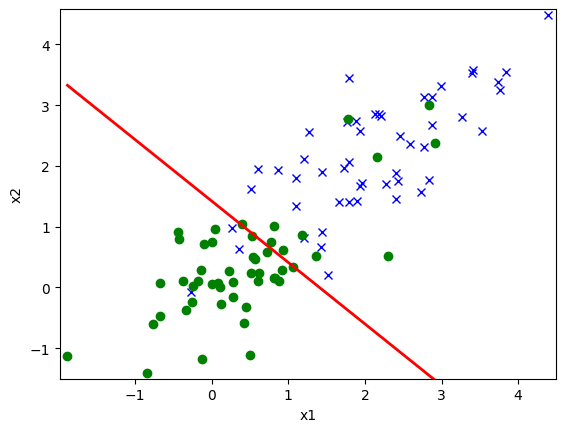

In [52]:
import numpy as np




x_train, y_train = load_dataset('ds2_train.csv')
x_valid, y_valid = load_dataset('ds2_valid.csv')
clf = GDA()
clf.fit(x_train, y_train)
plot(x_valid, y_valid, clf.theta)
#np.savetxt(save_path, clf.predict(x_valid))



